In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from plot_functions import plot_volcano
import numpy as np
import scipy as sp

In [2]:
df_res = pd.read_csv('out.tsv', sep='\t', names=['CHROM', 'START', 'END', 'REF', 'ALT', 'SAMPLE', 'GENE', 'ANNOT', 'MUT_TYPE', 'CONTEXT'])

In [3]:
df_res

,CHROM,START,END,REF,ALT,SAMPLE,GENE,ANNOT,MUT_TYPE,CONTEXT
0,1,566107,566108,A,G,TCGA-WC-AA9A-01A,.,Noncoding,A>G,TAA
1,1,569341,569342,T,C,TCGA-V4-A9ES-01A,.,Noncoding,T>C,CTC
2,1,569517,569518,G,A,TCGA-VD-A8KF-01A,.,Noncoding,G>A,AGC
3,1,752696,752697,G,A,TCGA-YZ-A985-01A,.,Noncoding,G>A,CGT
4,1,872255,872256,T,G,TCGA-V4-A9F5-01A,.,Noncoding,T>G,TTG
...,...,...,...,...,...,...,...,...,...,...
152009,22,51093797,51093798,C,-,TCGA-VD-AA8O-01A,.,INDEL,Noncoding_INDEL,.
152010,22,51140977,51140978,G,A,TCGA-YZ-A985-01A,.,Noncoding,G>A,CGC
152011,22,51141986,51141987,G,A,TCGA-YZ-A985-01A,.,Noncoding,G>A,CGC
152012,22,51169437,51169438,G,A,TCGA-YZ-A985-01A,SHANK3,Missense,G>A,CGC


In [4]:
df_res.SAMPLE.unique().shape[0]

71

TCGA-YZ-A985-01A: 25000 number of mutations


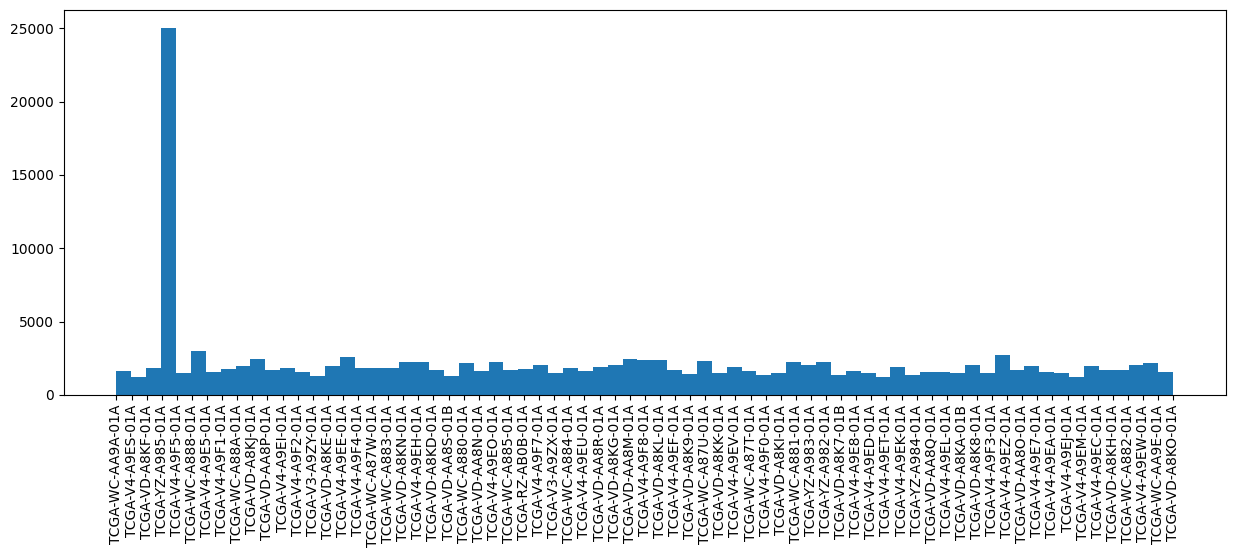

In [5]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.hist(df_res.SAMPLE, bins=df_res.SAMPLE.unique().shape[0])
ax.tick_params(axis='x', labelrotation=90)
ids, cts = np.unique(df_res.SAMPLE, return_counts=True)
idx_max = np.argsort(cts)[-1]
print(ids[idx_max] + ': ' + str(cts[idx_max]) + ' number of mutations')
plt.show()

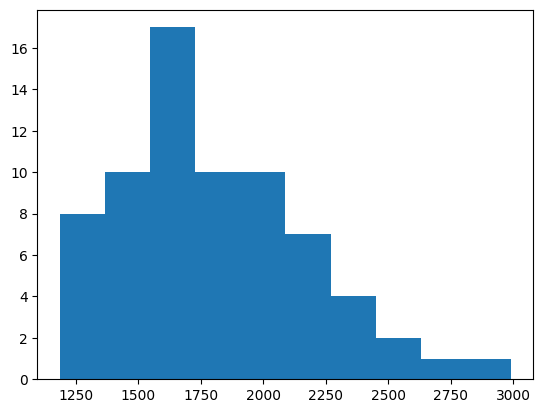

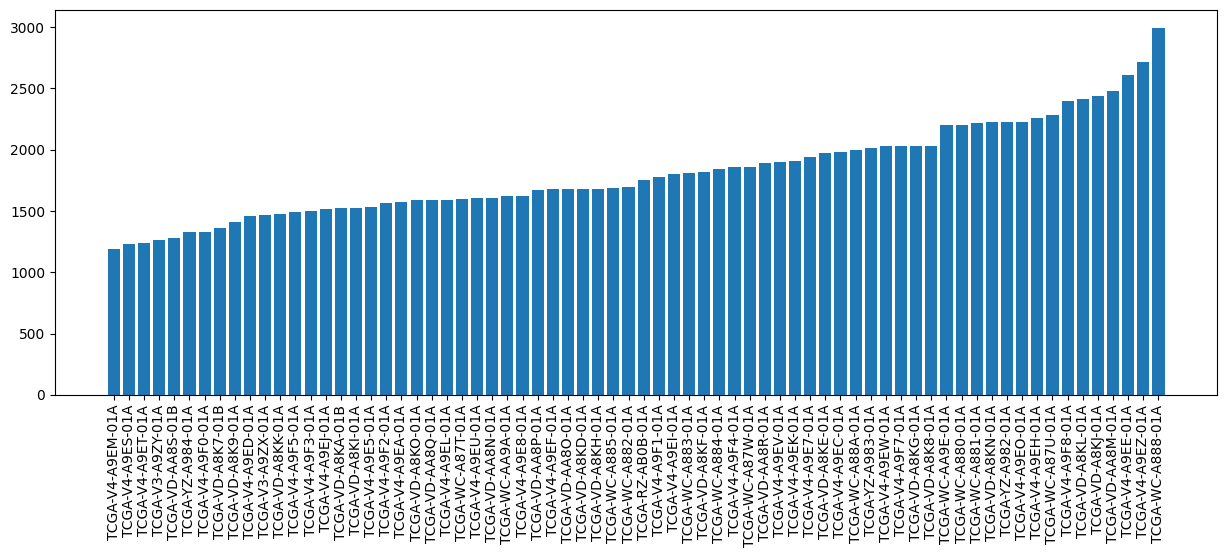

In [6]:
outliers = ['TCGA-YZ-A985-01A']
ids, cts = np.unique(df_res.loc[~df_res.SAMPLE.isin(outliers), 'SAMPLE'], return_counts=True)
plt.hist(cts)
plt.show()

fig, ax = plt.subplots(figsize=(15, 5))
ind_sorted = np.argsort(cts)
plt.bar(ids[ind_sorted], cts[ind_sorted])
ax.tick_params(axis='x', labelrotation=90)
plt.show()

In [7]:
df = pd.read_csv('genes.results.txt', sep='\t')

/Users/dlehotzk/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


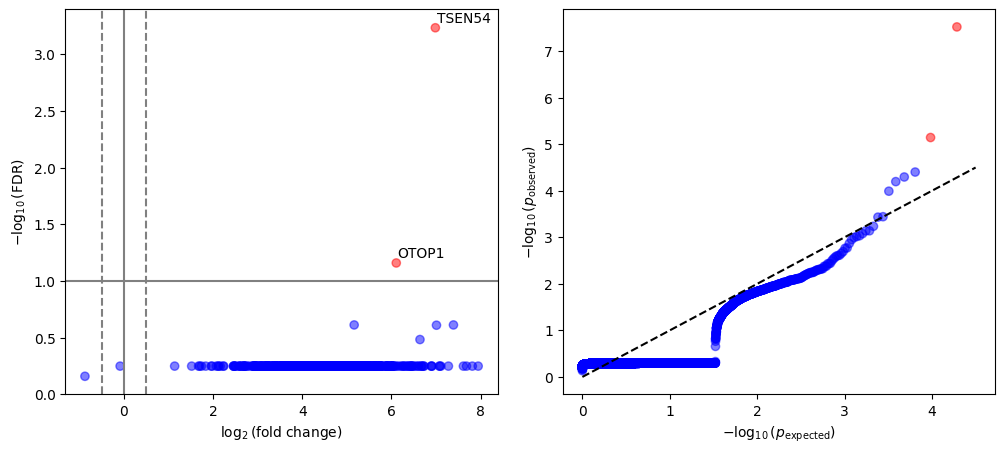

In [8]:
d = np.log2(df.OBS_SYN) - np.log2(df.EXP_SYN)
p = df.PVAL_SYN_BURDEN
l = df.GENE
plot_volcano(p, d, l)

/Users/dlehotzk/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


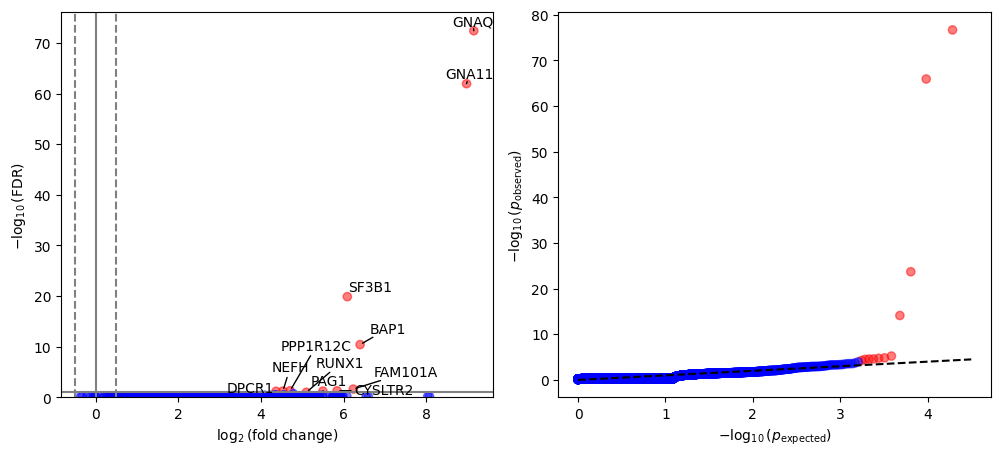

In [9]:
d = np.log2(df.OBS_NONSYN) - np.log2(df.EXP_NONSYN)
p = df.PVAL_NONSYN_BURDEN
l = df.GENE
plot_volcano(p, d, l)

/Users/dlehotzk/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


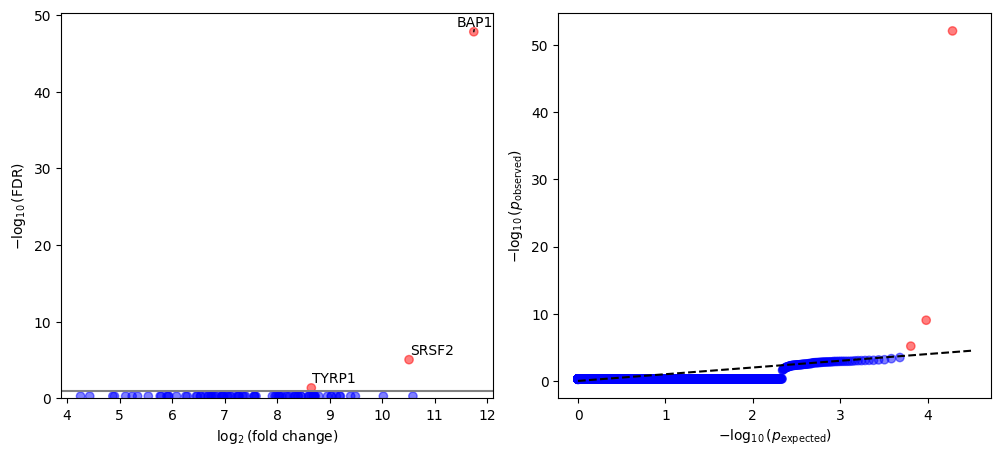

In [10]:
d = np.log2(df.OBS_INDEL) - np.log2(df.EXP_INDEL)
p = df.PVAL_INDEL_BURDEN
l = df.GENE
ind_keep = ~d.isna()
plot_volcano(p[ind_keep], d[ind_keep], l[ind_keep])

In [11]:
df.columns.tolist()

['GENE',
 'CHROM',
 'GENE_LENGTH',
 'R_SIZE',
 'R_OBS',
 'R_INDEL',
 'MU',
 'SIGMA',
 'ALPHA',
 'THETA',
 'MU_INDEL',
 'SIGMA_INDEL',
 'ALPHA_INDEL',
 'THETA_INDEL',
 'FLAG',
 'Pi_SYN',
 'Pi_MIS',
 'Pi_NONS',
 'Pi_SPL',
 'Pi_TRUNC',
 'Pi_NONSYN',
 'Pi_INDEL',
 'OBS_SYN',
 'OBS_MIS',
 'OBS_NONS',
 'OBS_SPL',
 'OBS_INDEL',
 'OBS_TRUNC',
 'OBS_NONSYN',
 'N_SAMP_SYN',
 'N_SAMP_MIS',
 'N_SAMP_NONS',
 'N_SAMP_SPL',
 'N_SAMP_TRUNC',
 'N_SAMP_NONSYN',
 'N_SAMP_INDEL',
 'EXP_SYN',
 'EXP_MIS',
 'EXP_NONS',
 'EXP_SPL',
 'EXP_TRUNC',
 'EXP_NONSYN',
 'PVAL_SYN_BURDEN',
 'PVAL_MIS_BURDEN',
 'PVAL_NONS_BURDEN',
 'PVAL_SPL_BURDEN',
 'PVAL_TRUNC_BURDEN',
 'PVAL_NONSYN_BURDEN',
 'PVAL_SYN_BURDEN_SAMPLE',
 'PVAL_MIS_BURDEN_SAMPLE',
 'PVAL_NONS_BURDEN_SAMPLE',
 'PVAL_SPL_BURDEN_SAMPLE',
 'PVAL_TRUNC_BURDEN_SAMPLE',
 'PVAL_NONSYN_BURDEN_SAMPLE',
 'EXP_INDEL',
 'PVAL_INDEL_BURDEN',
 'PVAL_MUT_BURDEN']

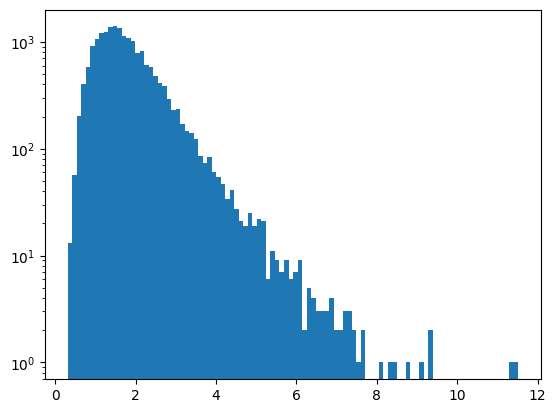

In [12]:
plt.hist(df.SIGMA, bins=100, log=True)
plt.show()